# Extraction

In [ ]:
import os
import tarfile

# Paths to source and destination directories
source_folder = "/content/drive/MyDrive/COMP550/final_project/data"
destination_folder = "/content/drive/MyDrive/COMP550/final_project/data/untarred"

# List all .tgz files in the source directory
tgz_files = [f for f in os.listdir(source_folder) if f.endswith(".tgz")]

# Track processed files using a log file
log_file_path = "/content/drive/MyDrive/COMP550/final_project/extraction_log.txt"
processed_files = []

# Load processed files from log file if it exists
if os.path.exists(log_file_path):
    with open(log_file_path, 'r') as log_file:
        processed_files = log_file.read().splitlines()

# Process files in batches
for tgz_file in tgz_files[:70]:  # Adjust batch size as needed
    # Skip files that are already processed
    if tgz_file in processed_files:
        print(f"Skipping {tgz_file}, already extracted.")
        continue

    tgz_path = os.path.join(source_folder, tgz_file)

    # Create a unique subfolder for each .tgz file's contents
    extract_folder = os.path.join(destination_folder, os.path.splitext(tgz_file)[0])

    # Ensure that no files are directly extracted without a subfolder
    os.makedirs(extract_folder, exist_ok=True)

    # Extract contents to the specific subfolder
    with tarfile.open(tgz_path, 'r:gz') as tar_ref:
        tar_ref.extractall(extract_folder)

    print(f"Extracted {tgz_file} to {extract_folder}")

    # Log the processed file
    with open(log_file_path, 'a') as log_file:
        log_file.write(f"{tgz_file}\n")

In [ ]:
import os
import tarfile

# Paths to source and destination directories
source_folder = "/content/drive/MyDrive/COMP550/final_project/data"
destination_folder = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard"

# List all .tar.bz2 files in the source directory
bz2_files = [f for f in os.listdir(source_folder) if f.endswith(".tar.bz2")]

# Track processed files using a log file
log_file_path = "/content/drive/MyDrive/COMP550/final_project/extraction_log.txt"
processed_files = []

# Load processed files from log file if it exists
if os.path.exists(log_file_path):
    with open(log_file_path, 'r') as log_file:
        processed_files = log_file.read().splitlines()

# Process files in batches
for bz2_file in bz2_files[:70]:  # Adjust batch size as needed
    # Skip files that are already processed
    if bz2_file in processed_files:
        print(f"Skipping {bz2_file}, already extracted.")
        continue

    bz2_path = os.path.join(source_folder, bz2_file)

    # Create a unique subfolder for each .tar.bz2 file's contents
    extract_folder = os.path.join(destination_folder, os.path.splitext(bz2_file)[0])

    # Ensure that no files are directly extracted without a subfolder
    os.makedirs(extract_folder, exist_ok=True)

    # Extract contents to the specific subfolder
    with tarfile.open(bz2_path, 'r:bz2') as tar_ref:
        tar_ref.extractall(extract_folder)

    print(f"Extracted {bz2_file} to {extract_folder}")

    # Log the processed file
    with open(log_file_path, 'a') as log_file:
        log_file.write(f"{bz2_file}\n")

In [ ]:
import os
import json

# Initialize a dictionary to store file hierarchy and first lines
file_hierarchy = {}

# Walk through the directory
for root, dirs, files in os.walk(source_folder):
    relative_path = os.path.relpath(root, source_folder)
    file_hierarchy[relative_path] = {}
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                first_line = f.readline().strip()  # Read the first line
        except Exception as e:
            first_line = f"Error reading file: {str(e)}"  # Handle unreadable files
        file_hierarchy[relative_path][file] = first_line

# Save the hierarchy and first lines as a JSON file
output_file = "/content/drive/MyDrive/COMP550/final_project/file_hierarchy.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(file_hierarchy, f, indent=4)

print(f"File hierarchy and first lines saved to {output_file}")

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define file paths in your Google Drive
source_folder = '/content/drive/MyDrive/COMP550/final_project/'

Mounted at /content/drive


# Pre-processing

## Canadian Hansard

In [ ]:
import os
import pandas as pd

# Define the path to the Canadian Hansard folder structure
canadian_hansard_folder = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/lipadcsv-1.1.0.tar/lipad"

# Define the target years for alignment (1999–2017)
target_years = [str(year) for year in range(1999, 2018)]

# Get folders matching the target years
aligned_folders = [folder for folder in os.listdir(canadian_hansard_folder) if folder in target_years]

# Process files within the aligned folders (including subfolders)
aligned_data = []
for year_folder in aligned_folders:
    year_path = os.path.join(canadian_hansard_folder, year_folder)
    for root, _, files in os.walk(year_path):  # Recursively walk through subdirectories
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                try:
                    # Load the CSV and append it to the list
                    df = pd.read_csv(file_path)
                    aligned_data.append(df)
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

# Combine all filtered data into a single DataFrame
if aligned_data:  # Check if the list is not empty
    canadian_aligned_df = pd.concat(aligned_data, ignore_index=True)

    # Save the filtered dataset for further processing
    output_path = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv"
    canadian_aligned_df.to_csv(output_path, index=False)
    print(f"Filtered Canadian Hansard data saved to {output_path}")
else:
    print("No CSV files found for the specified years.")

## Nunavut Hansard

In [ ]:
import os

# Define paths to Nunavut Hansard files
nunavut_english_path = "/content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/Nunavut-Hansard-Inuktitut-English-Parallel-Corpus-3.0.1/Nunavut-Hansard-Inuktitut-English-Parallel-Corpus-3.0/NunavutHansard.en"
nunavut_metadata_path = "/content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/Nunavut-Hansard-Inuktitut-English-Parallel-Corpus-3.0.1/Nunavut-Hansard-Inuktitut-English-Parallel-Corpus-3.0/NunavutHansard.id"

# Output file path for the complete preprocessed data
output_file = "/content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/preprocessed_nunavut_hansard.txt"
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Load the English text and metadata
with open(nunavut_english_path, 'r', encoding='utf-8') as f_en:
    english_lines = f_en.readlines()

with open(nunavut_metadata_path, 'r', encoding='utf-8') as f_meta:
    metadata_lines = f_meta.readlines()

# Clean and organize data
cleaned_data = []
for line, metadata in zip(english_lines, metadata_lines):
    line = line.strip()
    if line:  # Skip blank lines
        cleaned_data.append({"text": line, "metadata": metadata.strip()})

# Save the cleaned data to a single file for tokenization
with open(output_file, 'w', encoding='utf-8') as f:
    for item in cleaned_data:
        f.write(item['text'] + '\n')

print(f"Complete preprocessed Nunavut Hansard data saved to {output_file}")

# Exploration

Total Lines: 1321268
Total Words: 17641997
Top 20 Most Common Words: [('the', 957839), ('to', 556758), ('mr', 469491), ('of', 442233), ('you', 406931), ('and', 385211), ('thank', 354412), ('that', 346118), ('i', 292384), ('in', 287597), ('speaker', 219868), ('for', 212848), ('a', 211711), ('we', 201630), ('is', 197326), ('chairman', 171967), ('interpretation', 171767), ('minister', 151071), ('have', 137943), ('it', 135967)]


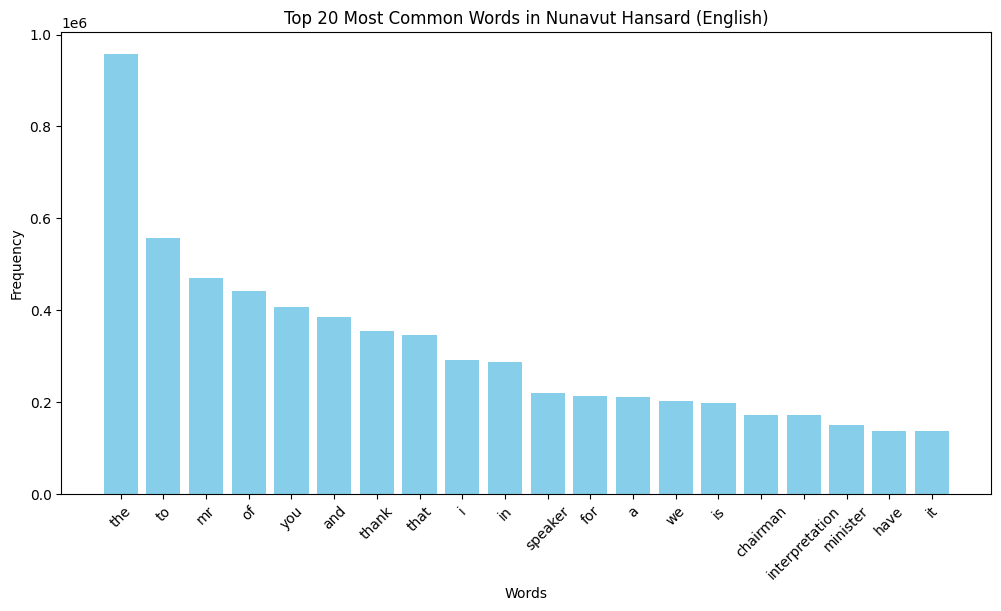

<ipython-input-7-fdc1b8800534>:48: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  canadian_df = pd.read_csv(filepath)


Canadian Hansard Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615565 entries, 0 to 615564
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   basepk           615565 non-null  int64  
 1   hid              615565 non-null  object 
 2   speechdate       615565 non-null  object 
 3   pid              539287 non-null  object 
 4   opid             527920 non-null  float64
 5   speakeroldname   527918 non-null  object 
 6   speakerposition  119603 non-null  object 
 7   maintopic        609067 non-null  object 
 8   subtopic         606031 non-null  object 
 9   subsubtopic      107926 non-null  object 
 10  speechtext       615563 non-null  object 
 11  speakerparty     527920 non-null  object 
 12  speakerriding    527920 non-null  object 
 13  speakername      601355 non-null  object 
 14  speakerurl       515068 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 7

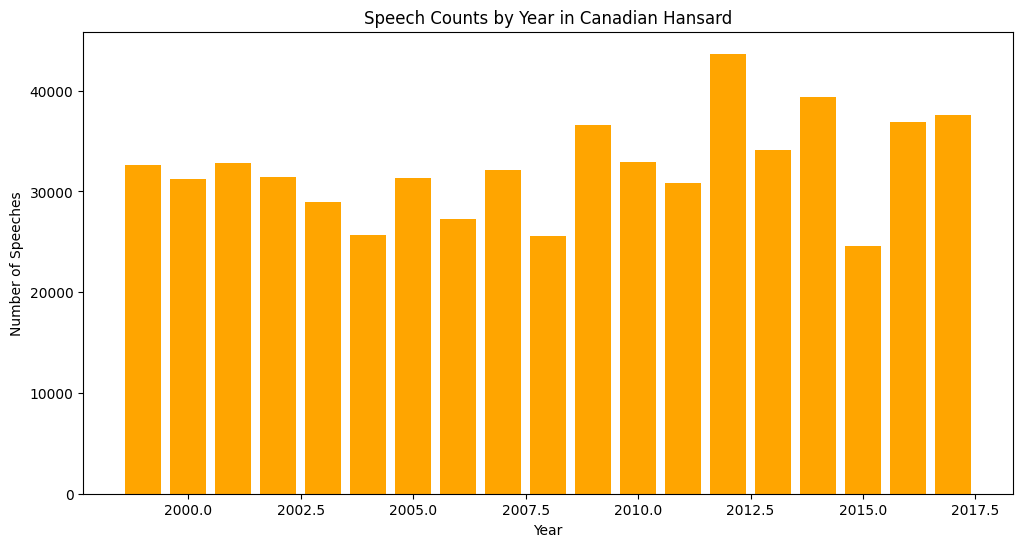

Sample Rows from Canadian Hansard:
    basepk                          hid speechdate  \
0  4236739  ca.proc.d.2003-01-30.1720.0 2003-01-30   
1  4236740  ca.proc.d.2003-01-30.1720.1 2003-01-30   
2  4236741  ca.proc.d.2003-01-30.1720.2 2003-01-30   
3  4236742  ca.proc.d.2003-01-30.1720.3 2003-01-30   
4  4236743  ca.proc.d.2003-01-30.1720.4 2003-01-30   

                                    pid    opid  \
0  3176068f-62ee-4b2f-aacd-1131201c6db1   242.0   
1  f6d1f5af-95f2-4262-bc52-ce4406fd2a0d   238.0   
2  3176068f-62ee-4b2f-aacd-1131201c6db1   242.0   
3  328b9cb9-24ea-4602-abb8-ff33227c2f3f  4458.0   
4  233caca3-acc5-4554-9c4f-4abf75950440   305.0   

                                      speakeroldname speakerposition  \
0  Mr. Geoff Regan (Parliamentary Secretary to th...             NaN   
1  Mr. Marcel Proulx (Parliamentary Secretary to ...             NaN   
2  Mr. Geoff Regan (Parliamentary Secretary to th...             NaN   
3              Hon. Charles Caccia (Davenport

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import re

# Paths to the processed files
nunavut_file = "/content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/preprocessed_nunavut_hansard.txt"
canadian_file = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv"

# Count lines and words in the Nunavut Hansard
def analyze_nunavut_data(filepath):
    line_count = 0
    word_count = 0
    all_words = []

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                line_count += 1
                words = re.findall(r'\b\w+\b', line.lower())  # Extract words
                word_count += len(words)
                all_words.extend(words)

    # Calculate word frequency distribution
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(20)  # Top 20 most common words

    # Display line and word counts
    print(f"Total Lines: {line_count}")
    print(f"Total Words: {word_count}")
    print(f"Top 20 Most Common Words: {common_words}")

    # Plot word frequency distribution
    plt.figure(figsize=(12, 6))
    word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    plt.bar(word_df['Word'], word_df['Frequency'], color='skyblue')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 Most Common Words in Nunavut Hansard (English)")
    plt.xticks(rotation=45)
    plt.show()

# Visualize Canadian Hansard
def visualize_canadian_data(filepath):
    # Load Canadian Hansard CSV
    canadian_df = pd.read_csv(filepath)

    # Check basic stats
    print("Canadian Hansard Dataset Summary:")
    print(canadian_df.info())

    # Plot the distribution of speech dates
    canadian_df['speechdate'] = pd.to_datetime(canadian_df['speechdate'])
    date_counts = canadian_df['speechdate'].dt.year.value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    plt.bar(date_counts.index, date_counts.values, color="orange")
    plt.xlabel("Year")
    plt.ylabel("Number of Speeches")
    plt.title("Speech Counts by Year in Canadian Hansard")
    plt.show()

    # Display sample rows
    print("Sample Rows from Canadian Hansard:")
    print(canadian_df.head(5))

# Run analyses and visualizations
analyze_nunavut_data(nunavut_file)
visualize_canadian_data(canadian_file)

<ipython-input-8-562031926f59>:20: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  canadian_df = pd.read_csv(canadian_file)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615565 entries, 0 to 615564
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   basepk           615565 non-null  int64  
 1   hid              615565 non-null  object 
 2   speechdate       615565 non-null  object 
 3   pid              539287 non-null  object 
 4   opid             527920 non-null  float64
 5   speakeroldname   527918 non-null  object 
 6   speakerposition  119603 non-null  object 
 7   maintopic        609067 non-null  object 
 8   subtopic         606031 non-null  object 
 9   subsubtopic      107926 non-null  object 
 10  speechtext       615563 non-null  object 
 11  speakerparty     527920 non-null  object 
 12  speakerriding    527920 non-null  object 
 13  speakername      601355 non-null  object 
 14  speakerurl       515068 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 70.4+ MB
None

Missin

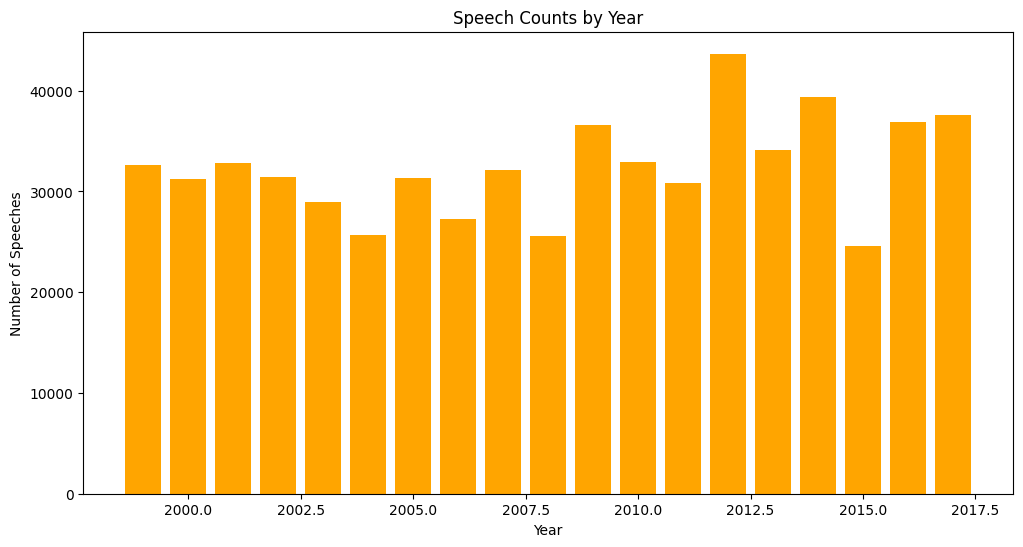

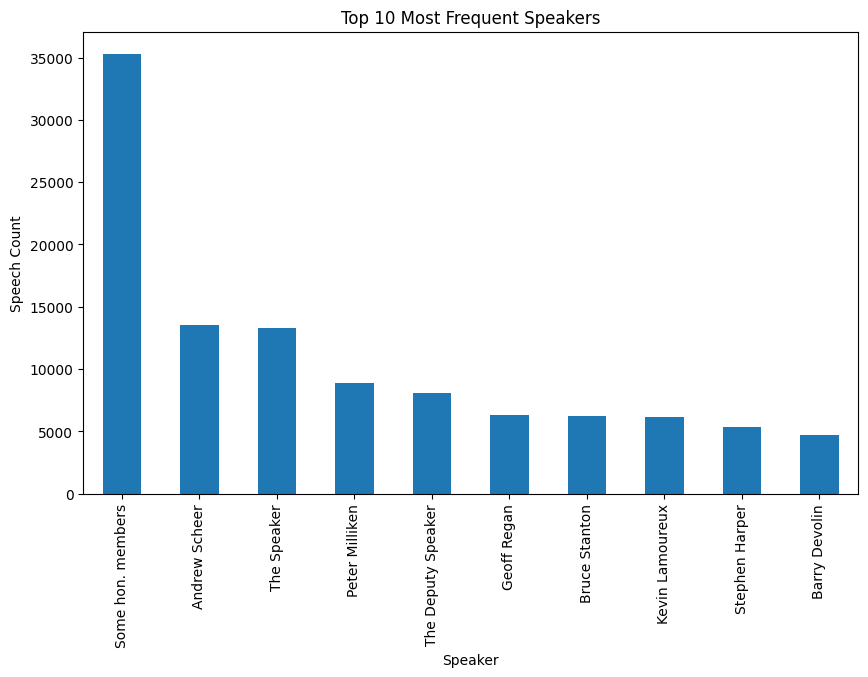

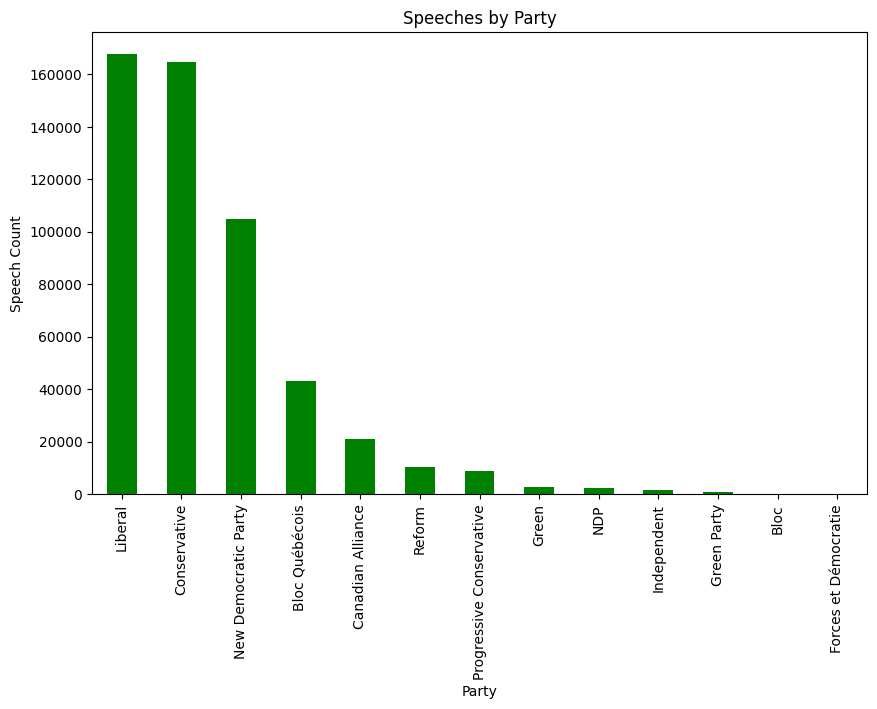

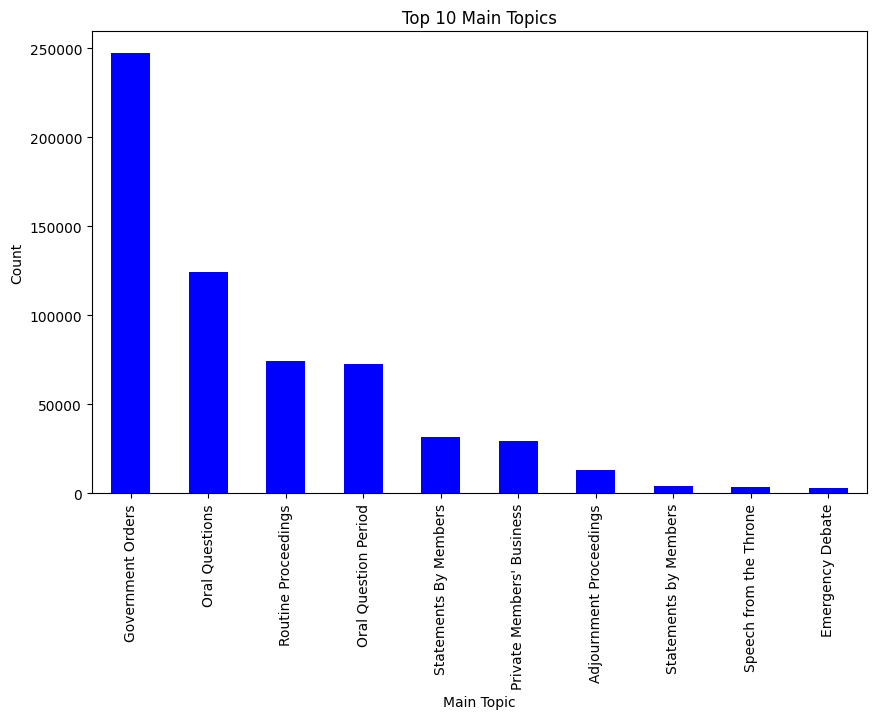

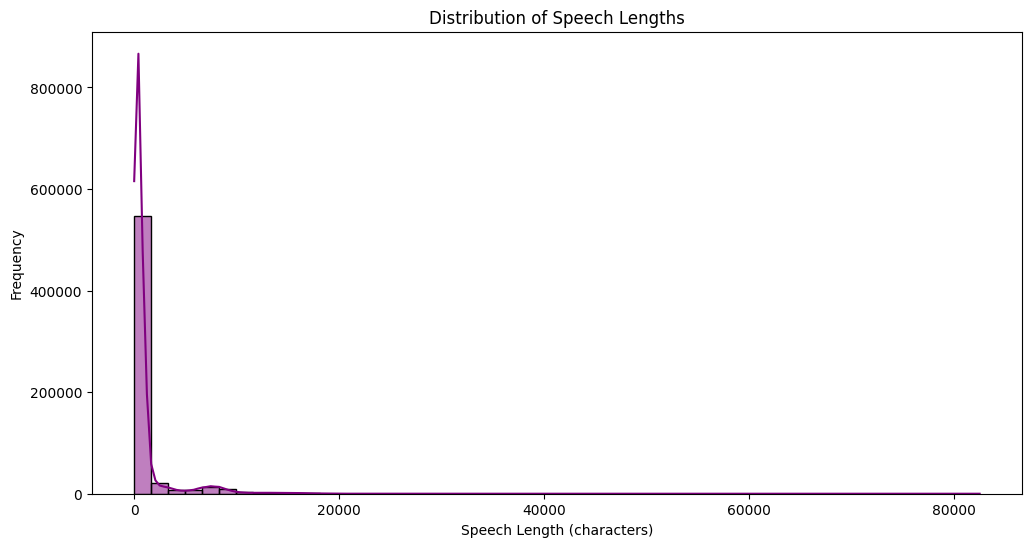

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

# File paths
canadian_file = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv"
output_file = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/preprocessed_canadian_hansard.txt"

# Function to clean text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Load the Canadian Hansard data
canadian_df = pd.read_csv(canadian_file)

# 1. Basic Information
print("Dataset Info:")
print(canadian_df.info())
print("\nMissing Values:\n", canadian_df.isnull().sum())
print("\nUnique Values per Column:\n", canadian_df.nunique())

# 2. Temporal Analysis
canadian_df['speechdate'] = pd.to_datetime(canadian_df['speechdate'])
yearly_counts = canadian_df['speechdate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Speeches")
plt.title("Speech Counts by Year")
plt.show()

# 3. Speaker Analysis
top_speakers = canadian_df['speakername'].value_counts().head(10)
top_speakers.plot(kind='bar', figsize=(10, 6), title="Top 10 Most Frequent Speakers")
plt.xlabel("Speaker")
plt.ylabel("Speech Count")
plt.show()

party_counts = canadian_df['speakerparty'].value_counts()
party_counts.plot(kind='bar', figsize=(10, 6), color="green", title="Speeches by Party")
plt.xlabel("Party")
plt.ylabel("Speech Count")
plt.show()

# 4. Topic Analysis
topic_counts = canadian_df['maintopic'].value_counts().head(10)
topic_counts.plot(kind='bar', figsize=(10, 6), color="blue", title="Top 10 Main Topics")
plt.xlabel("Main Topic")
plt.ylabel("Count")
plt.show()

# 5. Text Length Analysis
canadian_df['speech_length'] = canadian_df['speechtext'].str.len()
plt.figure(figsize=(12, 6))
sns.histplot(canadian_df['speech_length'], bins=50, kde=True, color="purple")
plt.title("Distribution of Speech Lengths")
plt.xlabel("Speech Length (characters)")
plt.ylabel("Frequency")
plt.show()

# 6. Word Cloud for Speech Text
cleaned_speeches = canadian_df['speechtext'].dropna().apply(clean_text)
all_text = ' '.join(cleaned_speeches)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Speech Text")
plt.show()

# 7. Export all speech text into a single file
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(all_text)

print(f"Preprocessed speech text saved to: {output_file}")

# Model Finetuning

In [ ]:
import threading
import time

def keep_alive():
    while True:
        print("Keeping the session alive...")
        time.sleep(60)  # Logs every 60 seconds to simulate activity

# Start the keep-alive thread
thread = threading.Thread(target=keep_alive)
thread.daemon = True
thread.start()

Keeping the session alive...


## Tokenization

In [ ]:
from transformers import RobertaTokenizer, RobertaModel

# Define the path where the base model will be saved
base_model_path = "/content/drive/MyDrive/COMP550/final_project/data/base_model"

# Load the pre-trained RoBERTa base model and tokenizer from Hugging Face
print("Downloading RoBERTa base model...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

# Save the model and tokenizer locally
print(f"Saving RoBERTa base model to {base_model_path}...")
tokenizer.save_pretrained(base_model_path)
model.save_pretrained(base_model_path)

print(f"RoBERTa base model saved at {base_model_path}.")

In [ ]:
pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
pip install --upgrade torch torchvision torchaudio

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

# File paths
canadian_file = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv"
nunavut_file = "/content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/preprocessed_nunavut_hansard.txt"
output_dir = "/content/drive/MyDrive/COMP550/final_project/models"

# Function to load Canadian dataset from CSV
def load_dataset_from_csv(file_path, text_column, label=0):
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)
    texts = df[text_column].dropna().tolist()  # Extract non-empty text entries
    labels = [label] * len(texts)  # Placeholder labels
    return Dataset.from_dict({"text": texts, "label": labels})

# Function to load Nunavut dataset from txt file
def load_dataset_from_txt(file_path, label=0):
    print(f"Loading dataset from {file_path}...")
    with open(file_path, "r", encoding="utf-8") as f:
        texts = [line.strip() for line in f if line.strip()]  # Filter empty lines
    labels = [label] * len(texts)  # Placeholder labels
    return Dataset.from_dict({"text": texts, "label": labels})

# Load datasets
print("Loading datasets...")
canadian_dataset = load_dataset_from_csv(canadian_file, text_column="speechtext", label=0)
nunavut_dataset = load_dataset_from_txt(nunavut_file, label=1)

# Create combined datasets for multilingual models
def create_combined_dataset(canadian, nunavut, ratio=None):
    if ratio is not None:
        num_canadian = int(len(canadian["text"]) * ratio)
        num_nunavut = len(canadian["text"]) - num_canadian
        combined_texts = canadian["text"][:num_canadian] + nunavut["text"][:num_nunavut]
        combined_labels = [0] * num_canadian + [1] * num_nunavut  # Placeholder labels
    else:
        combined_texts = canadian["text"] + nunavut["text"]  # Combine full datasets
        combined_labels = [0] * len(canadian["text"]) + [1] * len(nunavut["text"])

    assert len(combined_texts) == len(combined_labels), "Mismatch in combined texts and labels length"
    return Dataset.from_dict({"text": combined_texts, "label": combined_labels})

imbalanced_ratio = 0.8  # 80% Canadian, 20% Nunavut
balanced_ratio = 0.5    # 50% Canadian, 50% Nunavut

imbalanced_dataset = create_combined_dataset(canadian_dataset, nunavut_dataset, imbalanced_ratio)
balanced_dataset = create_combined_dataset(canadian_dataset, nunavut_dataset, balanced_ratio)
fully_combined_dataset = create_combined_dataset(canadian_dataset, nunavut_dataset)  # Full datasets combined

# Tokenizer
print("Loading tokenizer...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

# Tokenize all datasets
datasets = {
    "canadian": canadian_dataset,
    "nunavut": nunavut_dataset,
    "imbalanced": imbalanced_dataset,
    "balanced": balanced_dataset,
    #"fully_combined": fully_combined_dataset,
}

for key in datasets:
    print(f"Tokenizing {key} dataset...")
    datasets[key] = datasets[key].map(tokenize, batched=True)
    datasets[key].set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Loading datasets...
Loading dataset from /content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv...
Keeping the session alive...


<ipython-input-6-fd5357688630>:13: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Loading dataset from /content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/preprocessed_nunavut_hansard.txt...
Keeping the session alive...
Loading tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Tokenizing fully_combined dataset...


Map:   0%|          | 0/1936831 [00:00<?, ? examples/s]

Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...


In [ ]:
import os
from datasets import Dataset

# Define the output directory for saving tokenized datasets
drive_save_path = "/content/drive/MyDrive/COMP550/final_project/tokenized_datasets"

# Ensure the directory exists
os.makedirs(drive_save_path, exist_ok=True)

# Save each dataset in the `datasets` dictionary
for key, dataset in datasets.items():
    save_path = os.path.join(drive_save_path, f"{key}_tokenized")
    print(f"Saving {key} dataset to {save_path}...")
    dataset.save_to_disk(save_path)

print("All datasets saved successfully!")

Saving fully_combined dataset to /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/fully_combined_tokenized...


Saving the dataset (0/12 shards):   0%|          | 0/1936831 [00:00<?, ? examples/s]

Keeping the session alive...
Keeping the session alive...
All datasets saved successfully!


## Fine-tuning

In [ ]:
# Fine-tuning function
def fine_tune_model(train_dataset, output_model_path, log_dir, num_labels=2):
    print(f"Fine-tuning model for {output_model_path}...")
    model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_labels)

    training_args = TrainingArguments(
        output_dir=output_model_path,
        evaluation_strategy="no",  # No validation dataset
        learning_rate=2e-5,
        per_device_train_batch_size=32,
        num_train_epochs=3,
        weight_decay=0.01,
        save_steps=5000,
        save_total_limit=1,
        logging_dir=log_dir,  # Directory for TensorBoard logs
        logging_steps=500,  # Log metrics every 500 steps
        fp16=True,  # Enable mixed precision for faster training
        report_to="none",  # Disable W&B logging
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        tokenizer=tokenizer,
    )

    trainer.train()
    model.save_pretrained(output_model_path)
    tokenizer.save_pretrained(output_model_path)
    print(f"Model saved to {output_model_path}")

In [ ]:
import os
from datasets import load_from_disk

# Define paths
log_dir = "./logs"  # Directory for logs
drive_load_path = "/content/drive/MyDrive/COMP550/final_project/tokenized_datasets"
output_dir = "/content/drive/MyDrive/COMP550/final_project/models"

# Model save paths
model_paths = {
    "canadian": os.path.join(output_dir, "canadian_hansard"),
    "nunavut": os.path.join(output_dir, "nunavut_hansard"),
    "imbalanced": os.path.join(output_dir, "imbalanced_multilingual"),
    "balanced": os.path.join(output_dir, "balanced_multilingual"),
    "fully_combined": os.path.join(output_dir, "fully_combined"),
}

# Load pre-saved tokenized datasets
datasets = {}
for key in model_paths.keys():
    load_path = os.path.join(drive_load_path, f"{key}_tokenized")
    print(f"Loading {key} dataset from {load_path}...")
    datasets[key] = load_from_disk(load_path)

# Ensure log directory exists
os.makedirs(log_dir, exist_ok=True)

# Train models
for key, dataset in datasets.items():
    log_path = os.path.join(log_dir, key)
    print(f"Training model for {key} dataset...")
    fine_tune_model(dataset, model_paths[key], log_path)

print("All models trained successfully!")

Loading fully_combined dataset from /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/fully_combined_tokenized...
Training model for fully_combined dataset...
Fine-tuning model for /content/drive/MyDrive/COMP550/final_project/models/fully_combined...


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-7-bb7aee491ca9>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.109000
1000,0.051600
1500,0.044100
2000,0.039100
2500,0.036000
3000,0.029600
3500,0.026800
4000,0.031600
4500,0.028000
5000,0.031500


Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the se

Step,Training Loss
500,0.109000
1000,0.051600
1500,0.044100
2000,0.039100
2500,0.036000
3000,0.029600
3500,0.026800
4000,0.031600
4500,0.028000
5000,0.031500


Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the se

# Embedding Space Analysis

## Ranking Method Conception

In [ ]:
pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import os
from datasets import load_from_disk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define paths
log_dir = "./logs"  # Directory for logs
drive_load_path = "/content/drive/MyDrive/COMP550/final_project/tokenized_datasets"
output_dir = "/content/drive/MyDrive/COMP550/final_project/models"

# Model save paths
model_paths = {
    "canadian": os.path.join(output_dir, "canadian_hansard"),
    "nunavut": os.path.join(output_dir, "nunavut_hansard"),
    "imbalanced": os.path.join(output_dir, "imbalanced_multilingual"),
    "balanced": os.path.join(output_dir, "balanced_multilingual"),
    "fully_combined": os.path.join(output_dir, "fully_combined"),
}

# Load pre-saved tokenized datasets
datasets = {}
for key in model_paths.keys():
    load_path = os.path.join(drive_load_path, f"{key}_tokenized")
    try:
        print(f"Loading {key} dataset from {load_path}...")
        datasets[key] = load_from_disk(load_path)
        print(f"{key} dataset loaded successfully.")
    except Exception as e:
        print(f"Failed to load {key} dataset. Error: {e}")

# Function to extract text from the dataset for TF-IDF analysis
def extract_text_for_tfidf(dataset):
    if "text" not in dataset.column_names:
        raise ValueError("The dataset does not have a 'text' column.")
    return dataset["text"]

# Apply TF-IDF analysis
def analyze_tfidf(texts, top_n=20):
    print("Performing TF-IDF analysis...")
    tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Sum up the scores for each word
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_ranking = pd.DataFrame({
        "word": feature_names,
        "score": tfidf_scores
    }).sort_values(by="score", ascending=False)

    # Get the top N words
    return tfidf_ranking.head(top_n)

# Perform TF-IDF analysis on all datasets
for dataset_name, dataset in datasets.items():
    try:
        print(f"Starting TF-IDF analysis for {dataset_name} dataset...")
        texts = extract_text_for_tfidf(dataset)
        top_words = analyze_tfidf(texts, top_n=20)
        print(f"Top TF-IDF words for {dataset_name}:")
        print(top_words)
        print("\n")
    except Exception as e:
        print(f"Error analyzing TF-IDF for {dataset_name}: {e}")

Loading canadian dataset from /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/canadian_tokenized...
canadian dataset loaded successfully.
Loading nunavut dataset from /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/nunavut_tokenized...
nunavut dataset loaded successfully.
Loading imbalanced dataset from /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/imbalanced_tokenized...
imbalanced dataset loaded successfully.
Loading balanced dataset from /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/balanced_tokenized...
balanced dataset loaded successfully.
Loading fully_combined dataset from /content/drive/MyDrive/COMP550/final_project/tokenized_datasets/fully_combined_tokenized...
fully_combined dataset loaded successfully.
Starting TF-IDF analysis for canadian dataset...
Performing TF-IDF analysis...
Top TF-IDF words for canadian:
            word         score
574       agreed  22923.888450
4171  government  19842.869705
5773  

## Clustering Embeddings with UMAP (Complete)

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


Loading model from roberta-base...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting embeddings: 100%|██████████| 7/7 [00:00<00:00, 26.61it/s]


Loading model from /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting embeddings: 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]


Loading model from /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting embeddings: 100%|██████████| 7/7 [00:00<00:00, 10.18it/s]


Loading model from /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting embeddings: 100%|██████████| 7/7 [00:00<00:00, 10.32it/s]


Loading model from /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting embeddings: 100%|██████████| 7/7 [00:00<00:00,  9.43it/s]
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Running UMAP...


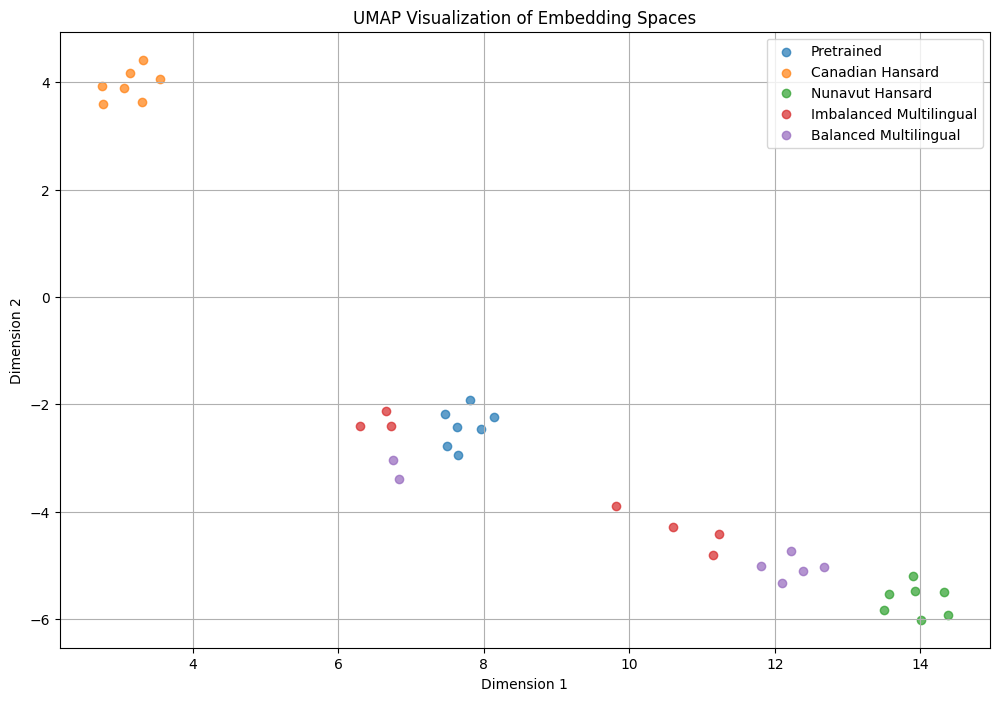

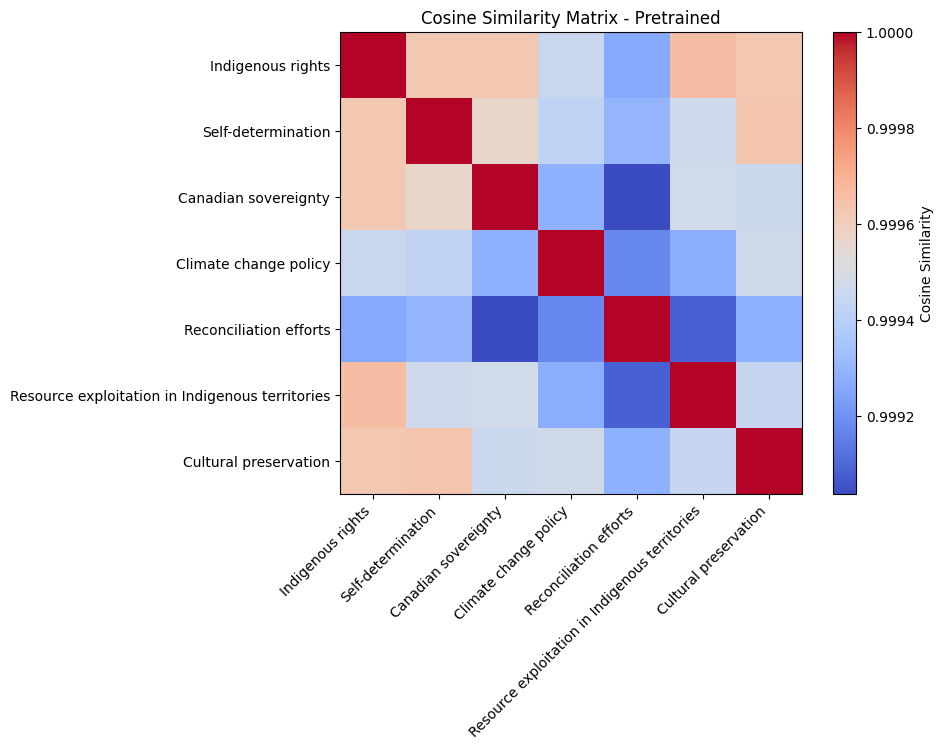

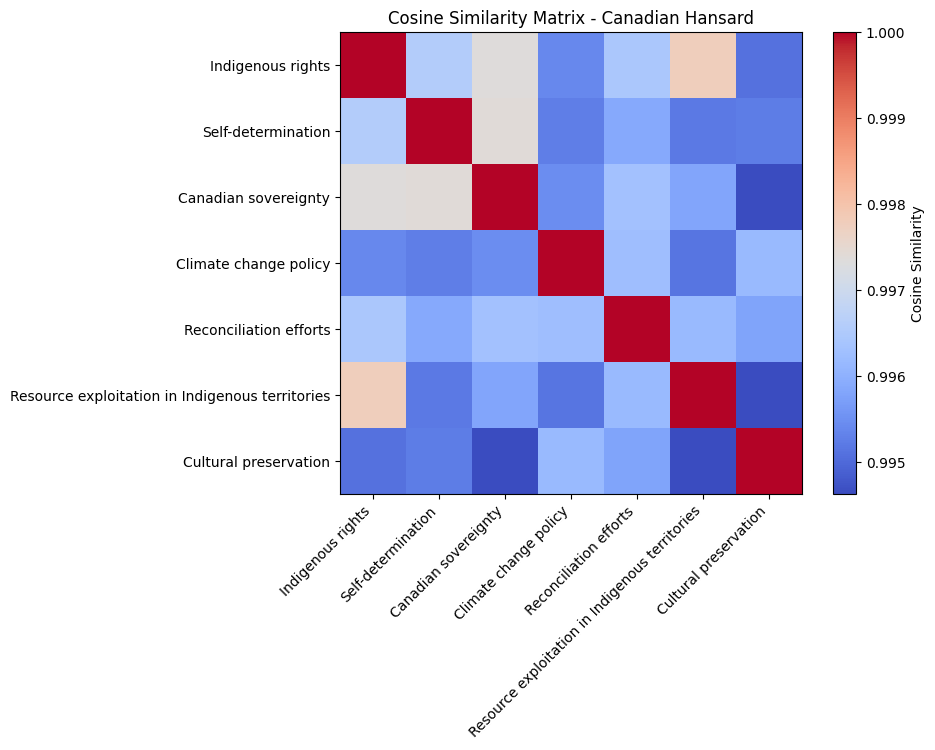

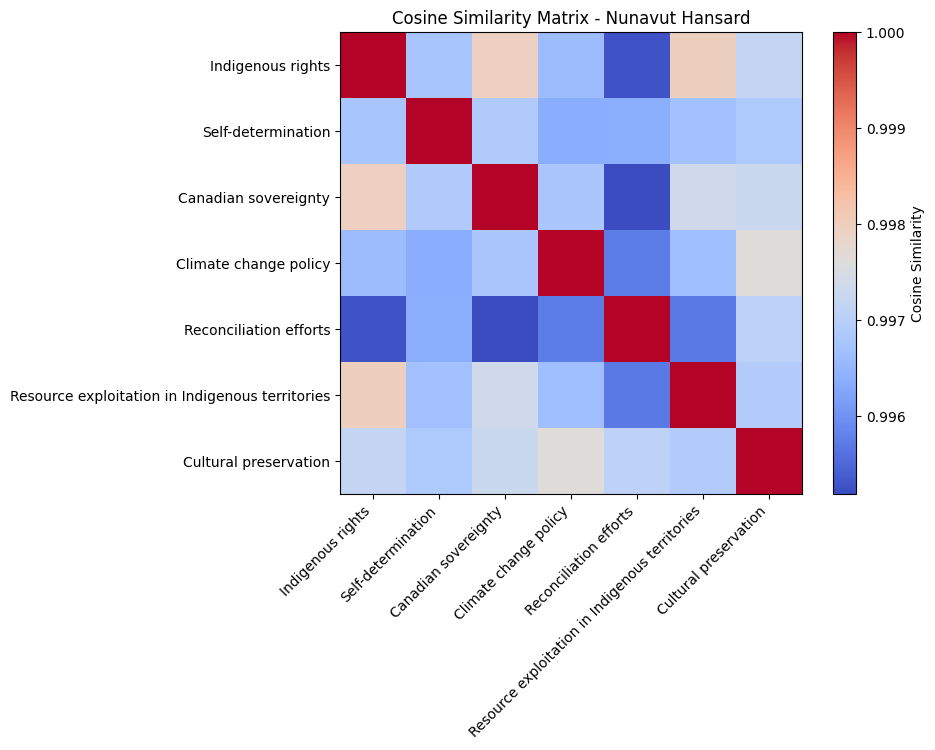

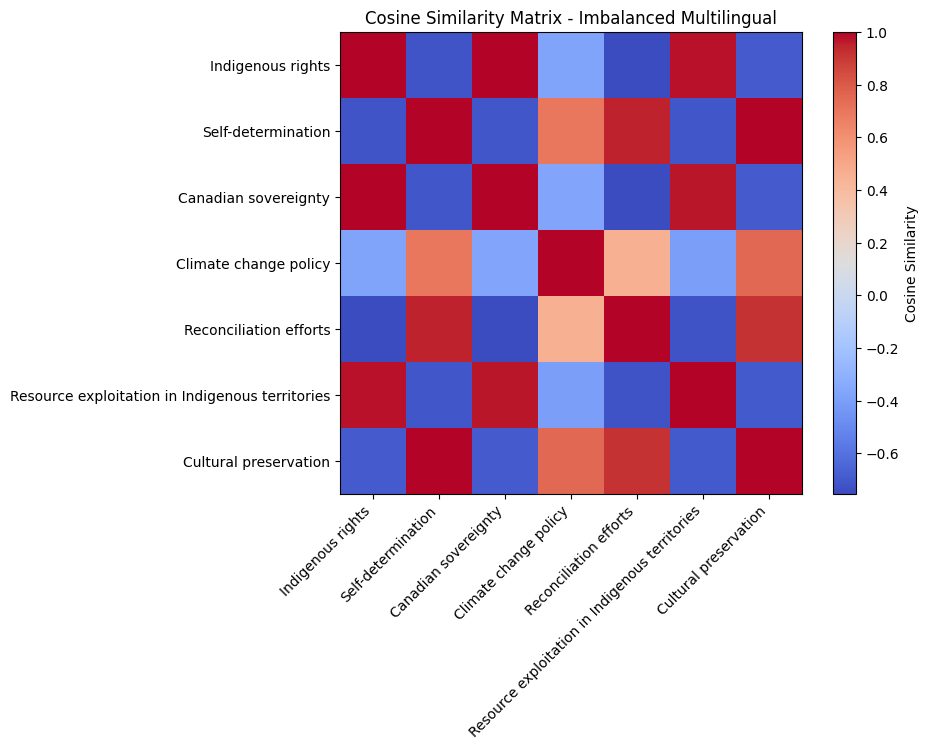

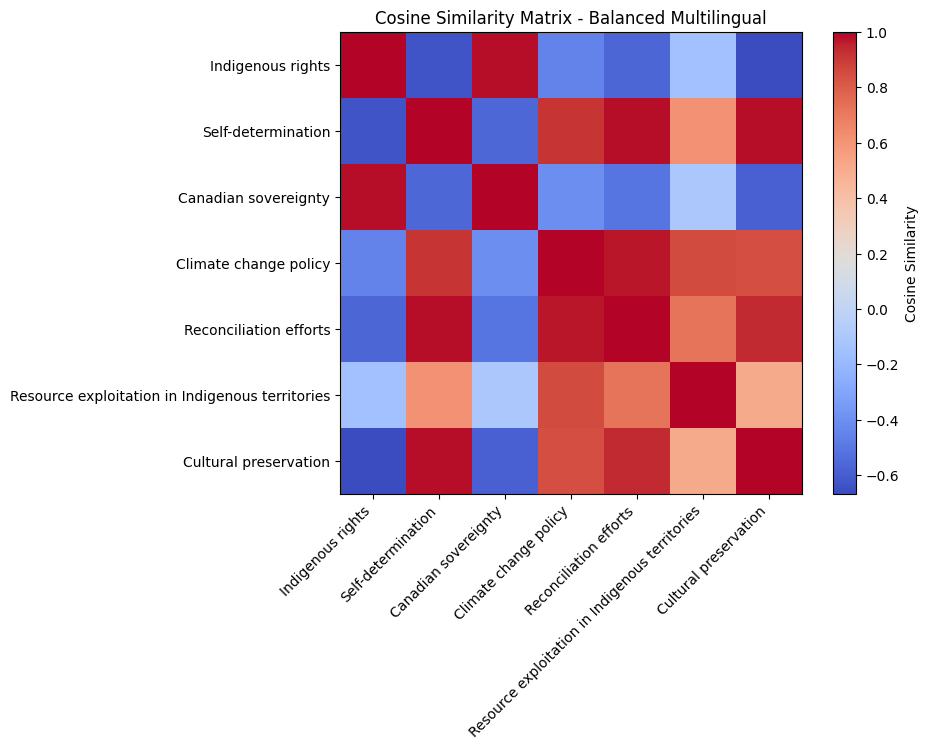

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
from sklearn.metrics.pairwise import cosine_similarity
import umap
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Paths to fine-tuned models
model_paths = {
    "Pretrained": "roberta-base",
    "Canadian Hansard": "/content/drive/MyDrive/COMP550/final_project/models/canadian_hansard",
    "Nunavut Hansard": "/content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard",
    "Imbalanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual",
    "Balanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual",
    #"Fully Combined": "/content/drive/MyDrive/COMP550/final_project/models/fully_combined",
}

# Politically charged words or sentences for analysis
charged_inputs = [
    "Indigenous rights",
    "Self-determination",
    "Canadian sovereignty",
    "Climate change policy",
    "Reconciliation efforts",
    "Resource exploitation in Indigenous territories",
    "Cultural preservation",
]

# Function to load models and tokenizers
def load_model_and_tokenizer(model_path):
    print(f"Loading model from {model_path}...")
    tokenizer = RobertaTokenizer.from_pretrained(model_path)
    model = RobertaModel.from_pretrained(model_path)
    model.eval()
    return tokenizer, model

# Extract embeddings for charged words/sentences
def extract_embeddings(texts, tokenizer, model):
    embeddings = []
    with torch.no_grad():
        for text in tqdm(texts, desc="Extracting embeddings"):
            inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # [CLS] token embedding
            embeddings.append(cls_embedding)
    return embeddings

# Analyze embeddings from all models
embedding_results = {}
for model_name, model_path in model_paths.items():
    tokenizer, model = load_model_and_tokenizer(model_path)
    embeddings = extract_embeddings(charged_inputs, tokenizer, model)
    embedding_results[model_name] = embeddings

# Combine embeddings for UMAP visualization
def combine_embeddings_for_umap(embedding_results):
    combined_embeddings = []
    labels = []
    for model_name, embeddings in embedding_results.items():
        combined_embeddings.extend(embeddings)
        labels.extend([model_name] * len(embeddings))
    return combined_embeddings, labels

combined_embeddings, combined_labels = combine_embeddings_for_umap(embedding_results)

# Dimensionality reduction with UMAP
def visualize_with_umap(embeddings, labels, charged_inputs):
    print("Running UMAP...")
    reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_embeddings = reducer.fit_transform(embeddings)

    # Create a DataFrame for visualization
    df = pd.DataFrame(reduced_embeddings, columns=["Dim1", "Dim2"])
    df["Model"] = labels
    df["Text"] = charged_inputs * len(model_paths)

    # Plot UMAP visualization
    plt.figure(figsize=(12, 8))
    for model_name in df["Model"].unique():
        subset = df[df["Model"] == model_name]
        plt.scatter(subset["Dim1"], subset["Dim2"], label=model_name, alpha=0.7)
    plt.legend()
    plt.title("UMAP Visualization of Embedding Spaces")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid()
    plt.show()

visualize_with_umap(combined_embeddings, combined_labels, charged_inputs)

# Cosine similarity analysis
def compute_cosine_similarity(embedding_results):
    cosine_similarities = {}
    for model_name, embeddings in embedding_results.items():
        cos_sim_matrix = cosine_similarity(embeddings)
        cosine_similarities[model_name] = cos_sim_matrix
    return cosine_similarities

cosine_similarities = compute_cosine_similarity(embedding_results)

# Visualize cosine similarity matrices
def plot_similarity_matrix(cosine_sim_matrix, model_name, texts):
    plt.figure(figsize=(8, 6))
    plt.imshow(cosine_sim_matrix, cmap="coolwarm", interpolation="nearest")
    plt.colorbar(label="Cosine Similarity")
    plt.xticks(range(len(texts)), texts, rotation=45, ha="right")
    plt.yticks(range(len(texts)), texts)
    plt.title(f"Cosine Similarity Matrix - {model_name}")
    plt.show()

for model_name, cos_sim_matrix in cosine_similarities.items():
    plot_similarity_matrix(cos_sim_matrix, model_name, charged_inputs)

## Word Pair Cosine Similarity (Complete)

Analyzing bias for model: Pretrained
Loading model from roberta-base...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing bias pairs for Pretrained: 100%|██████████| 6/6 [00:00<00:00, 12.26it/s]


Analyzing bias for model: Canadian Hansard
Loading model from /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing bias pairs for Canadian Hansard: 100%|██████████| 6/6 [00:00<00:00,  6.47it/s]


Analyzing bias for model: Nunavut Hansard
Loading model from /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing bias pairs for Nunavut Hansard: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]


Analyzing bias for model: Imbalanced Multilingual
Loading model from /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing bias pairs for Imbalanced Multilingual: 100%|██████████| 6/6 [00:00<00:00,  7.53it/s]


Analyzing bias for model: Balanced Multilingual
Loading model from /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing bias pairs for Balanced Multilingual: 100%|██████████| 6/6 [00:00<00:00,  7.74it/s]


Bias analysis results saved to 'bias_analysis_results.csv'.


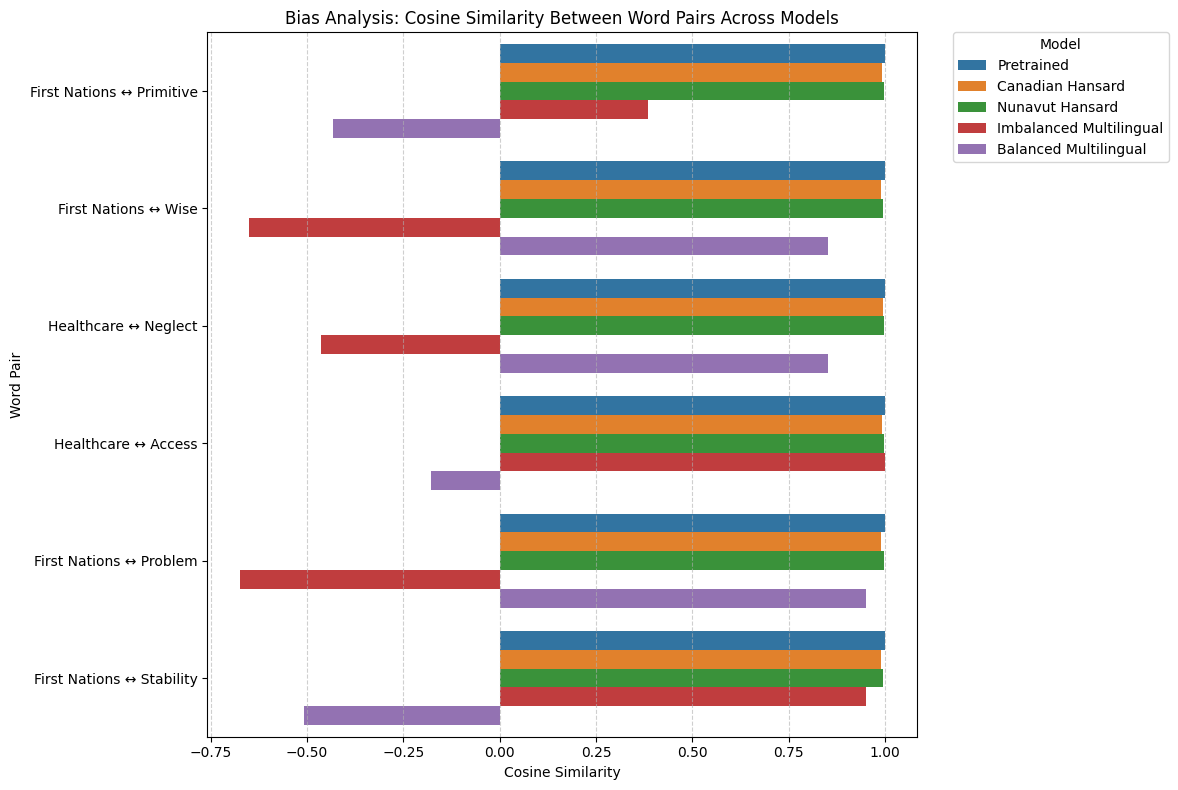

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from tqdm import tqdm

# Paths to fine-tuned models
model_paths = {
    "Pretrained": "roberta-base",
    "Canadian Hansard": "/content/drive/MyDrive/COMP550/final_project/models/canadian_hansard",
    "Nunavut Hansard": "/content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard",
    "Imbalanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual",
    "Balanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual",
    #"Fully Combined": "/content/drive/MyDrive/COMP550/final_project/models/fully_combined",
}

# Word pairs for bias analysis
bias_pairs = [
    ("First Nations", "Primitive"),
    ("First Nations", "Wise"),
    ("Healthcare", "Neglect"),
    ("Healthcare", "Access"),
    ("First Nations", "Problem"),
    ("First Nations", "Stability"),
]

# Word pairs for bias analysis
bank_of_bias_pairs = [
    ("Government", "Consultation"),
    ("Government", "Imposition"),
    ("Policy", "Inclusion"),
    ("Policy", "Exclusion"),
    ("Indigenous", "Traditional"),
    ("Indigenous", "Modern"),
    ("First Nations", "Primitive"),
    ("First Nations", "Advanced"),
    ("Justice", "Equality"),
    ("Justice", "Disparity"),
    ("Resource Extraction", "Benefit"),
    ("Resource Extraction", "Harm"),
    ("Economic Development", "Opportunity"),
    ("Economic Development", "Exploitation"),
    ("Healthcare", "Access"),
    ("Healthcare", "Neglect"),
    ("Education", "Empowerment"),
    ("Education", "Assimilation"),
    ("Land", "Stewardship"),
    ("Land", "Exploitation"),
    ("Environment", "Protection"),
    ("Environment", "Degradation"),
    ("Protest", "Violent"),
    ("Protest", "Peaceful"),
    ("Activist", "Radical"),
    ("Activist", "Advocate"),
    ("Indigenous", "Problem"),
    ("Indigenous", "Victim"),
    ("Inuit", "Problem"),
    ("Inuit", "Victim"),
    ("First Nations", "Problem"),
    ("First Nations", "Victim"),
    ("Nunavut", "Problem"),
    ("Nunavut", "Victim"),
]

# Function to load models and tokenizers
def load_model_and_tokenizer(model_path):
    print(f"Loading model from {model_path}...")
    tokenizer = RobertaTokenizer.from_pretrained(model_path)
    model = RobertaModel.from_pretrained(model_path)
    model.eval()
    return tokenizer, model

# Extract embeddings for words/phrases
def extract_embedding(text, tokenizer, model):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()  # [CLS] token embedding
    return cls_embedding

# Analyze bias across models
def analyze_bias(model_paths, bias_pairs):
    bias_results = {}
    for model_name, model_path in model_paths.items():
        print(f"Analyzing bias for model: {model_name}")
        tokenizer, model = load_model_and_tokenizer(model_path)
        results = {}
        for word1, word2 in tqdm(bias_pairs, desc=f"Processing bias pairs for {model_name}"):
            embedding1 = extract_embedding(word1, tokenizer, model)
            embedding2 = extract_embedding(word2, tokenizer, model)
            cos_sim = cosine_similarity([embedding1], [embedding2])[0][0]
            results[f"{word1} ↔ {word2}"] = cos_sim
        bias_results[model_name] = results
    return bias_results

# Run bias analysis
bias_results = analyze_bias(model_paths, bias_pairs)

# Convert results to a DataFrame for easy visualization
def results_to_dataframe(bias_results):
    all_results = []
    for model_name, results in bias_results.items():
        for pair, score in results.items():
            all_results.append({"Model": model_name, "Pair": pair, "Cosine Similarity": score})
    return pd.DataFrame(all_results)

bias_df = results_to_dataframe(bias_results)

# Save results to CSV
bias_df.to_csv("/content/drive/MyDrive/COMP550/final_project/results/bias_analysis_results.csv", index=False)
print("Bias analysis results saved to 'bias_analysis_results.csv'.")

# Visualize results with a bar plot
def plot_bias_results(bias_df):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))
    sns.barplot(data=bias_df, x="Cosine Similarity", y="Pair", hue="Model", dodge=True)
    plt.title("Bias Analysis: Cosine Similarity Between Word Pairs Across Models")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Word Pair")

    # Move the legend outside the plot
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_bias_results(bias_df)

## Full Vocabulary Ranking (Complete)

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
import pandas as pd
from tqdm import tqdm
import re

# Paths to fine-tuned models
model_paths = {
    "Pretrained": "roberta-base",
    "Canadian Hansard": "/content/drive/MyDrive/COMP550/final_project/models/canadian_hansard",
    "Nunavut Hansard": "/content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard",
    "Imbalanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual",
    "Balanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual",
}

# Vocabulary terms for ranking
vocabulary_terms = [
    "Government", "Land", "Rights", "Reconciliation", "Culture", "Tradition", "Leadership",
    "Exploitation", "Equality", "Inclusion", "Community", "Justice", "Preservation", "Inuit",
    "Nunavut", "Canadians", "Healthcare", "First Nations", "Indigenous", "Environment", "Education",
    "Assimilation", "Environment",
]

def load_model_and_tokenizer(model_path):
    print(f"Loading model from {model_path}...")
    tokenizer = RobertaTokenizer.from_pretrained(model_path)
    model = RobertaModel.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    return tokenizer, model

def extract_embeddings(words, tokenizer, model):
    with torch.no_grad():
        inputs = tokenizer(words, return_tensors="pt", truncation=True, max_length=512, padding=True).to(model.device)
        outputs = model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS] token embeddings
    return cls_embeddings

def analyze_full_vocab_ranking(model_paths, vocabulary_terms):
    ranking_results = {}
    for model_name, model_path in model_paths.items():
        print(f"Analyzing model: {model_name} with full vocabulary")
        tokenizer, model = load_model_and_tokenizer(model_path)

        # Récupérer tous les tokens du vocabulaire
        all_tokens = tokenizer.get_vocab().keys()

        # Décoder chaque token pour obtenir le mot complet
        decoded_full_vocab = []
        token_ids = []
        for token in all_tokens:
            token_id = tokenizer.convert_tokens_to_ids(token)
            decoded_word = tokenizer.decode([token_id]).strip()
            # On vérifie que le decoded_word n'est pas vide et qu'il ne s'agit pas de caractères isolés
            if decoded_word and re.match(r"^[A-Za-zÀ-ÖØ-öø-ÿ-]+$", decoded_word):
                decoded_full_vocab.append(decoded_word)
                token_ids.append(token_id)

        # Extraire les embeddings pour tout le vocabulaire décodé
        full_vocab_embeddings = []
        batch_size = 64
        for i in tqdm(range(0, len(decoded_full_vocab), batch_size), desc="Extracting full vocabulary embeddings"):
            batch_words = decoded_full_vocab[i:i + batch_size]
            batch_embeddings = extract_embeddings(batch_words, tokenizer, model)
            full_vocab_embeddings.append(batch_embeddings)
        full_vocab_embeddings = torch.cat(full_vocab_embeddings, dim=0)

        # Extraire les embeddings pour les mots cibles
        target_embeddings = extract_embeddings(vocabulary_terms, tokenizer, model)

        # Calculer les similarités cosines et trouver les plus proches
        for i, target_word in enumerate(vocabulary_terms):
            similarities = torch.nn.functional.cosine_similarity(
                target_embeddings[i].unsqueeze(0), full_vocab_embeddings, dim=1
            )
            top_k = torch.topk(similarities, k=30)
            ranking_results[(model_name, target_word)] = [(decoded_full_vocab[j], sim.item()) for j, sim in zip(top_k.indices, top_k.values)]

    return ranking_results

def save_ranking_to_csv(ranking_results, output_file="ranking_results.csv"):
    data = []
    for (model_name, target_word), closest_words in ranking_results.items():
        for closest_word, similarity in closest_words:
            data.append({
                "Model": model_name,
                "Target Word": target_word,
                "Closest Word": closest_word,
                "Cosine Similarity": similarity,
            })
    df = pd.DataFrame(data)
    df.to_csv(output_file, index=False)
    print(f"Results saved to {output_file}")

# Lancer l'analyse
ranking_results = analyze_full_vocab_ranking(model_paths, vocabulary_terms)

# Sauvegarder les résultats
save_ranking_to_csv(ranking_results, "/content/drive/MyDrive/COMP550/final_project/results/full_vocab_ranking_results_cleaned.csv")

Analyzing model: Pretrained with full vocabulary
Loading model from roberta-base...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting full vocabulary embeddings: 100%|██████████| 735/735 [04:09<00:00,  2.95it/s]


Analyzing model: Canadian Hansard with full vocabulary
Loading model from /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting full vocabulary embeddings: 100%|██████████| 735/735 [03:44<00:00,  3.27it/s]


Analyzing model: Nunavut Hansard with full vocabulary
Loading model from /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting full vocabulary embeddings: 100%|██████████| 735/735 [03:42<00:00,  3.30it/s]


Analyzing model: Imbalanced Multilingual with full vocabulary
Loading model from /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting full vocabulary embeddings: 100%|██████████| 735/735 [03:41<00:00,  3.32it/s]


Analyzing model: Balanced Multilingual with full vocabulary
Loading model from /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Extracting full vocabulary embeddings: 100%|██████████| 735/735 [03:43<00:00,  3.29it/s]


Results saved to /content/drive/MyDrive/COMP550/final_project/results/full_vocab_ranking_results_cleaned.csv


In [ ]:
import pandas as pd

# Define the file path
file_path = "/content/drive/MyDrive/COMP550/final_project/results/full_vocab_ranking_results_cleaned.csv"

# Load the CSV file into a DataFrame
def load_ranking_results(file_path):
    """
    Loads the ranking results CSV into a pandas DataFrame.
    """
    try:
        ranking_results = pd.read_csv(file_path)
        print(f"DataFrame loaded successfully with {ranking_results.shape[0]} rows and {ranking_results.shape[1]} columns.")
        return ranking_results
    except FileNotFoundError:
        print(f"File not found at: {file_path}")
        return None

# Load the DataFrame
ranking_results_df = load_ranking_results(file_path)

# Display the first few rows
if ranking_results_df is not None:
    print(ranking_results_df.head())

DataFrame loaded successfully with 3300 rows and 4 columns.
        Model Target Word  Closest Word  Cosine Similarity
0  Pretrained  Government    Government           1.000000
1  Pretrained  Government    Government           1.000000
2  Pretrained  Government   Governments           0.999782
3  Pretrained  Government      Ministry           0.999776
4  Pretrained  Government  Organisation           0.999773


In [ ]:
import re

def print_top_words_cleaned(ranking_results, target_word):
    """
    Prints the top 30 closest words and their cosine similarity for a given target word,
    filtering out non-sensical words (e.g., special characters, unusual tokens).
    """
    def is_valid_word(word):
        # Define criteria for valid words (only alphabetic characters or hyphenated words)
        return bool(re.match(r"^[a-zA-Z-]+$", word))

    # Filter results for the specific target word
    filtered_results = ranking_results[ranking_results["Target Word"] == target_word]

    # Get top 30 closest words across all models
    top_words = filtered_results.groupby("Model", group_keys=False).apply(
        lambda x: x.nlargest(30, "Cosine Similarity")  # Fetch more words to account for filtering
    )

    # Filter out non-sensical words
    top_words = top_words[top_words["Closest Word"].apply(is_valid_word)]

    # Print results
    for model in top_words["Model"].unique():
        print(f"Top 30 closest words for '{target_word}' in model '{model}':")
        model_words = top_words[top_words["Model"] == model].head(30)  # Ensure top 30 after filtering
        for _, row in model_words.iterrows():
            print(f"  - {row['Closest Word']}: {row['Cosine Similarity']:.4f}")
        print("\n")

vocabulary_terms = [
    "Government", "Land", "Rights", "Reconciliation", "Culture", "Tradition", "Leadership",
    "Exploitation", "Equality", "Inclusion", "Community", "Justice", "Preservation", "Inuit",
    "Nunavut", "Canadians", "Healthcare", "First Nations", "Indigenous", "Environment", "Education",
    "Assimilation", "Environment",
]

# Example usage:
print_top_words_cleaned(ranking_results_df, "First Nations")

Top 30 closest words for 'First Nations' in model 'Balanced Multilingual':
  - Element: 1.0000
  - Element: 1.0000
  - leaf: 1.0000
  - leaf: 1.0000
  - itans: 1.0000
  - After: 1.0000
  - After: 1.0000
  - Recommend: 1.0000
  - Recommend: 1.0000
  - witch: 1.0000
  - lees: 1.0000
  - witch: 1.0000
  - otherapy: 1.0000
  - occult: 1.0000
  - pat: 1.0000
  - pat: 1.0000
  - prior: 1.0000
  - jar: 1.0000
  - din: 1.0000
  - din: 1.0000
  - jar: 1.0000
  - ATER: 1.0000
  - covenant: 1.0000
  - treat: 1.0000
  - CRE: 1.0000
  - CRE: 1.0000
  - hurried: 1.0000
  - indu: 1.0000
  - Hurricanes: 1.0000
  - indu: 1.0000


Top 30 closest words for 'First Nations' in model 'Canadian Hansard':
  - NSW: 0.9956
  - Bigfoot: 0.9955
  - Frontier: 0.9953
  - Federation: 0.9953
  - Confederation: 0.9951
  - wildfire: 0.9950
  - fraternity: 0.9950
  - federation: 0.9950
  - Ontario: 0.9950
  - wildfires: 0.9949
  - Communities: 0.9949
  - Liberals: 0.9949
  - victims: 0.9949
  - Liberties: 0.9948
  - Que

<ipython-input-17-e22f2ac72cdd>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_words = filtered_results.groupby("Model", group_keys=False).apply(


## WEAT Score (Complete)

In [ ]:
import torch
from transformers import RobertaTokenizer, RobertaModel
from scipy.spatial.distance import cosine
import numpy as np

# Paths to fine-tuned models
model_paths = {
    "Pretrained": "roberta-base",
    "Canadian Hansard": "/content/drive/MyDrive/COMP550/final_project/models/canadian_hansard",
    "Nunavut Hansard": "/content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard",
    "Imbalanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual",
    "Balanced Multilingual": "/content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual",
}

# Word sets for WEAT
target_X = ["community", "land", "tradition", "heritage", "nature", "spirituality", "sovereignty"]
target_Y = ["poverty", "exclusion", "marginalization", "exploitation", "colonialism", "displacement"]
attribute_A = ["Indigenous", "First Nations", "Inuit", "Métis", "tribal", "ancestral"]
attribute_B = ["Canadian", "settler", "colonial", "modern", "urban", "government"]

# Function to load model and tokenizer
def load_model_and_tokenizer(model_path):
    print(f"Loading model from {model_path}...")
    tokenizer = RobertaTokenizer.from_pretrained(model_path)
    model = RobertaModel.from_pretrained(model_path)
    model.eval()
    model = model.to("cuda" if torch.cuda.is_available() else "cpu")  # Enable GPU
    return tokenizer, model

# Extract embeddings for a word
def extract_embedding(word, tokenizer, model):
    with torch.no_grad():
        inputs = tokenizer(word, return_tensors="pt", truncation=True, max_length=512, padding=True).to(model.device)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze(0).cpu().numpy()  # [CLS] token embedding
    return cls_embedding

# Compute WEAT score
def compute_weat_score(target_X, target_Y, attribute_A, attribute_B, tokenizer, model):
    # Extract embeddings
    def embed(words):
        return np.array([extract_embedding(word, tokenizer, model) for word in words])

    X_embeddings = embed(target_X)
    Y_embeddings = embed(target_Y)
    A_embeddings = embed(attribute_A)
    B_embeddings = embed(attribute_B)

    # Cosine similarity-based association
    def association(word_vec, attr_set_1, attr_set_2):
        mean_1 = np.mean([1 - cosine(word_vec, attr) for attr in attr_set_1])
        mean_2 = np.mean([1 - cosine(word_vec, attr) for attr in attr_set_2])
        return mean_1 - mean_2

    # Compute WEAT score
    s_X = np.sum([association(x, A_embeddings, B_embeddings) for x in X_embeddings])
    s_Y = np.sum([association(y, A_embeddings, B_embeddings) for y in Y_embeddings])
    return s_X - s_Y

# Run WEAT for all models
def run_weat_for_models(model_paths, target_X, target_Y, attribute_A, attribute_B):
    weat_results = {}
    for model_name, model_path in model_paths.items():
        print(f"Running WEAT for model: {model_name}")
        tokenizer, model = load_model_and_tokenizer(model_path)
        score = compute_weat_score(target_X, target_Y, attribute_A, attribute_B, tokenizer, model)
        weat_results[model_name] = score
        print(f"WEAT score for {model_name}: {score:.4f}")
    return weat_results

# Perform WEAT
weat_results = run_weat_for_models(model_paths, target_X, target_Y, attribute_A, attribute_B)

# Print results
print("\nFinal WEAT Results:")
for model, score in weat_results.items():
    print(f"Model: {model}, WEAT Score: {score:.4f}")

Running WEAT for model: Pretrained
Loading model from roberta-base...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


WEAT score for Pretrained: -0.0009
Running WEAT for model: Canadian Hansard
Loading model from /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/canadian_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


WEAT score for Canadian Hansard: -0.0031
Running WEAT for model: Nunavut Hansard
Loading model from /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/nunavut_hansard and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


WEAT score for Nunavut Hansard: -0.0121
Running WEAT for model: Imbalanced Multilingual
Loading model from /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/imbalanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


WEAT score for Imbalanced Multilingual: -0.7653
Running WEAT for model: Balanced Multilingual
Loading model from /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual...


Some weights of RobertaModel were not initialized from the model checkpoint at /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


WEAT score for Balanced Multilingual: -0.2102

Final WEAT Results:
Model: Pretrained, WEAT Score: -0.0009
Model: Canadian Hansard, WEAT Score: -0.0031
Model: Nunavut Hansard, WEAT Score: -0.0121
Model: Imbalanced Multilingual, WEAT Score: -0.7653
Model: Balanced Multilingual, WEAT Score: -0.2102


# Masked Language Modelling

## Finetuning MLM Models (RobertaForMaskedLM)

In [ ]:
import threading
import time

def keep_alive():
    while True:
        print("Keeping the session alive...")
        time.sleep(1000)  # Logs every 60 seconds to simulate activity

# Start the keep-alive thread
thread = threading.Thread(target=keep_alive)
thread.daemon = True
thread.start()

Keeping the session alive...


In [ ]:
pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
pip install --upgrade torch torchvision torchaudio

In [ ]:
from transformers import RobertaTokenizer, RobertaForMaskedLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_dataset, Dataset
import os
import pandas as pd

# File paths
canadian_file = "/content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv"
nunavut_file = "/content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/preprocessed_nunavut_hansard.txt"
output_dir = "/content/drive/MyDrive/COMP550/final_project/models"

# Function to load Canadian dataset from CSV
def load_dataset_from_csv(file_path, text_column):
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)
    texts = df[text_column].dropna().tolist()  # Extract non-empty text entries
    return Dataset.from_dict({"text": texts})

# Function to load Nunavut dataset from txt file
def load_dataset_from_txt(file_path):
    print(f"Loading dataset from {file_path}...")
    with open(file_path, "r", encoding="utf-8") as f:
        texts = [line.strip() for line in f if line.strip()]  # Filter empty lines
    return Dataset.from_dict({"text": texts})

# Load datasets
print("Loading datasets...")
canadian_dataset = load_dataset_from_csv(canadian_file, text_column="speechtext")
nunavut_dataset = load_dataset_from_txt(nunavut_file)

# Create combined datasets for multilingual models
def create_combined_dataset(canadian, nunavut, ratio=None):
    if ratio is not None:
        num_canadian = int(len(canadian["text"]) * ratio)
        num_nunavut = len(canadian["text"]) - num_canadian
        combined_texts = canadian["text"][:num_canadian] + nunavut["text"][:num_nunavut]
    else:
        combined_texts = canadian["text"] + nunavut["text"]  # Combine full datasets

    return Dataset.from_dict({"text": combined_texts})

imbalanced_ratio = 0.8  # 80% Canadian, 20% Nunavut
balanced_ratio = 0.5    # 50% Canadian, 50% Nunavut

imbalanced_dataset = create_combined_dataset(canadian_dataset, nunavut_dataset, imbalanced_ratio)
balanced_dataset = create_combined_dataset(canadian_dataset, nunavut_dataset, balanced_ratio)

# Tokenizer
print("Loading tokenizer...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)

# Tokenize all datasets
datasets = {
    #"canadian": canadian_dataset,
    #"nunavut": nunavut_dataset,
    #"imbalanced": imbalanced_dataset,
    "balanced": balanced_dataset,
}

for key in datasets:
    print(f"Tokenizing {key} dataset...")
    datasets[key] = datasets[key].map(tokenize, batched=True)
    datasets[key].set_format(type="torch", columns=["input_ids", "attention_mask"])

Loading datasets...
Loading dataset from /content/drive/MyDrive/COMP550/final_project/data/canadian_hansard/filtered_canadian_hansard.csv...


<ipython-input-13-01dd657bb30d>:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Loading dataset from /content/drive/MyDrive/COMP550/final_project/data/nunavut_hansard/preprocessed_nunavut_hansard.txt...
Loading tokenizer...
Tokenizing balanced dataset...


Map:   0%|          | 0/615563 [00:00<?, ? examples/s]

In [ ]:
import os

# Define the directory path to save tokenized datasets
drive_save_path = "/content/drive/MyDrive/COMP550/final_project/tokenized_mlm_datasets"

# Ensure the directory exists
os.makedirs(drive_save_path, exist_ok=True)

# Save each tokenized dataset to the specified directory
for key, dataset in datasets.items():
    save_path = os.path.join(drive_save_path, f"{key}_tokenized")
    print(f"Saving {key} dataset to {save_path}...")
    dataset.save_to_disk(save_path)

print("All tokenized datasets have been successfully saved!")

Saving balanced dataset to /content/drive/MyDrive/COMP550/final_project/tokenized_mlm_datasets/balanced_tokenized...


Saving the dataset (0/4 shards):   0%|          | 0/615563 [00:00<?, ? examples/s]

All tokenized datasets have been successfully saved!


In [ ]:
import torch
# Data Collator for MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

# Fine-tuning function for MLM
def fine_tune_mlm_model(train_dataset, output_model_path, log_dir):
    print(f"Fine-tuning MLM model for {output_model_path}...")
    model = RobertaForMaskedLM.from_pretrained("roberta-base").to("cuda" if torch.cuda.is_available() else "cpu")

    training_args = TrainingArguments(
        output_dir=output_model_path,
        evaluation_strategy="no",
        learning_rate=2e-5,
        per_device_train_batch_size=8,  # Reduced due to GPU memory constraints
        num_train_epochs=3,
        weight_decay=0.01,
        save_steps=5000,
        save_total_limit=1,
        logging_dir=log_dir,
        logging_steps=500,
        fp16=True,  # Mixed precision training
        report_to="none",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        tokenizer=tokenizer,
        data_collator=data_collator,
    )

    trainer.train()
    model.save_pretrained(output_model_path)
    tokenizer.save_pretrained(output_model_path)
    print(f"Model saved to {output_model_path}")

# Define paths for logs and saved models
log_dir = "./logs"  # Directory for logs
output_dir = "/content/drive/MyDrive/COMP550/final_project/models"

# Model save paths
model_paths = {
    "canadian": os.path.join(output_dir, "canadian_hansard_mlm"),
    "nunavut": os.path.join(output_dir, "nunavut_hansard_mlm"),
    "imbalanced": os.path.join(output_dir, "imbalanced_multilingual_mlm"),
    "balanced": os.path.join(output_dir, "balanced_multilingual_mlm"),
}

# Train MLM models
for key, dataset in datasets.items():
    log_path = os.path.join(log_dir, key)
    print(f"Training MLM model for {key} dataset...")
    fine_tune_mlm_model(dataset, model_paths[key], log_path)

print("All MLM models trained successfully!")

Training MLM model for balanced dataset...
Fine-tuning MLM model for /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual_mlm...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-15-e52cfa914801>:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,1.474700
1000,1.366500
1500,1.342900
2000,1.294000
2500,1.277500
3000,1.262000
3500,1.264600
4000,1.264500
4500,1.284200
5000,1.256400


Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Keeping the session alive...
Model saved to /content/drive/MyDrive/COMP550/final_project/models/balanced_multilingual_mlm
All MLM models trained successfully!
